In [22]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.fft

from few.trajectory.inspiral import EMRIInspiral
from few.waveform import GenerateEMRIWaveform
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import *

os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *
# set initial parameters
M = 1e6
m = 1e1
mu = 3.4e-17
a = 0.9
p0 = 10.0
e0 = 0.2
iota0 = 0.0
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.


qS = 0.2
phiS = 0.8
qK = 0.2
phiK = 0.8
dist = 1.0
mich = False
dt = 15.0
T = 5.0

alphaval = alphavalue(M,mu)
print(r"alpha = {0}".format(alphaval))


use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "npoints": 500,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

alpha = 0.25442669409345564


# With Proca

In [23]:
pc = ProcaSolution(M,a,mu)
conv = m/pc.BosonCloudMass()
asymptoticBosonCloudEFlux = pc.BosonCloudGWEFlux()*conv #dimenionsless flux in units of secondary mass over time
asymptoticBosonCloudLFlux = pc.BosonCloudGWLFlux()*conv*pc.BosonCloudMass() #dimensionless angular momentum in units of secondary's energy times mass of cloud
inspiral_kwargs["DeltaEFlux"] = asymptoticBosonCloudEFlux
inspiral_kwargs["DeltaLFlux"] = asymptoticBosonCloudLFlux
inspiral_kwargs["FluxName"] = 'analytic'
tp,pp,ep,xp,phiphip,phithetap,phirp = traj(pc.FinalBHMass,m,pc.FinalBHSpin, p0,e0,Y0,T=T, **inspiral_kwargs)

Integration halted before ending time. Reasons: Semi-latus rectum failed to decrease. Possibly beyond validity of PN expressions for fluxes or proca flux drastically exceeds GW flux.


# Without Proca

In [24]:
traj = PNTraj(bhspin=pc.FinalBHSpin)
t,p,e,x,phiphi,phitheta,phir = traj(pc.FinalBHMass,m,pc.FinalBHSpin, p0,e0,Y0,T=T,**inspiral_kwargs)

Integration halted before ending time. Reasons: Semi-latus rectum failed to decrease. Possibly beyond validity of PN expressions for fluxes or proca flux drastically exceeds GW flux.


# Plot

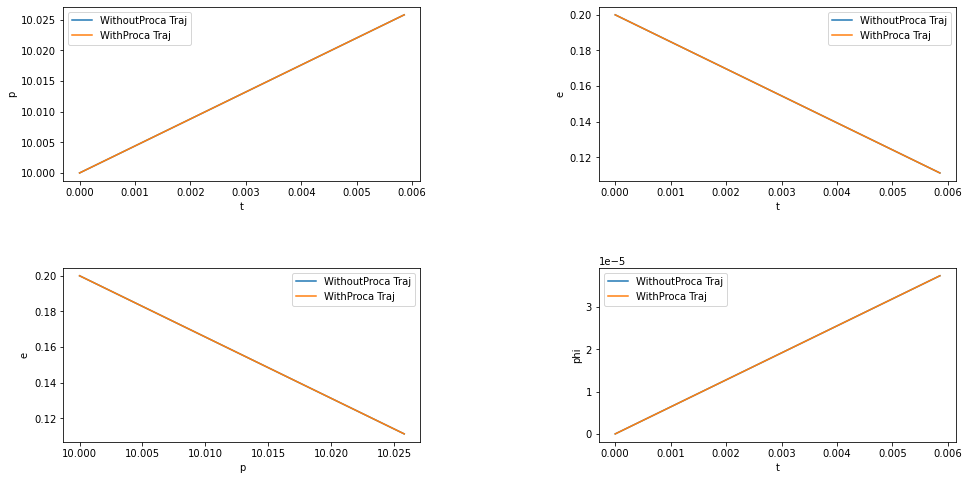

In [25]:
fig,ax = plt.subplots(2,2)

plt.subplots_adjust(wspace=0.5,hspace=0.5)
fig.set_size_inches(16, 8)
ax[0,0].plot(t,p, label="WithoutProca Traj")
ax[0,0].set_xlabel("t")
ax[0,0].set_ylabel("p")
ax[0,0].plot(tp,pp, label="WithProca Traj")
ax[0,0].legend()

ax[0,1].plot(t,e, label="WithoutProca Traj")
ax[0,1].set_xlabel("t")
ax[0,1].set_ylabel("e")
ax[0,1].plot(tp,ep, label="WithProca Traj")
ax[0,1].legend()

ax[1,0].plot(p,e, label="WithoutProca Traj")
ax[1,0].set_xlabel("p")
ax[1,0].set_ylabel("e")
ax[1,0].plot(pp,ep, label="WithProca Traj")
ax[1,0].legend()

ax[1,1].plot(t,phiphi, label="WithoutProca Traj")
ax[1,1].set_xlabel("t")
ax[1,1].set_ylabel("phi")
ax[1,1].plot(tp,phiphip, label="WithProca Traj")
ax[1,1].legend();

In [18]:
traj.inspiral_kwargs

AttributeError: 'PNTraj' object has no attribute 'inspiral_kwargs'

In [10]:
ep[-10]==ep[-1]

True